<img typeof="foaf:Image" src="indata/ANTI-INFECTIVES-RGB_200pc.png" alt="Wellcome Centre for Anti-Infectives Research" title="">

# Analysis of Protein Turnover in <i>T. brucei</i>

Michele Tinti

Wellcome Centre for Anti-Infectives Research
School of Life Sciences, University of Dundee


In [1]:
#import library

#computing
import os
import pandas as pd
import numpy as np
from scipy import stats

#plotting
import matplotlib.pyplot as plt

#some ad-hoc scripts
from utilities.utilities import print_result, clean_id, clean
import warnings

## Analysis Start
This is the first notebook for the analysis of the protein turnover in T. brucei. In here we process the BSF data.
### Setting up
<ul>
    <li>Download data files from
        <a href="https://uod.box.com/s/gdqrld2i3n1xun0kkot4mfq3bgg2w54b">here</a>
    </li>
    <li>in the same folder were this notebook sits create a new "indata" folder
    </li>
    <li>Move the data files to the "indata" folder
    </li>    
</ul> 

In [2]:
#set some variable to extract the data
#3 biological replicates
_TAG_REPLICA=['_A' , '_B', '_C']

#7 time points for BS
#these are the headers
_TAG=['0h', '05h','1h','2h','4h','8h','12h']
#these are the growth factors
_GROWTH_FACTOR=np.ones(21)#[1, 1, 1, 1, 1.10, 1.45, 2.1,
                #1, 1, 1, 1, 1.10, 1.45, 1.94,
               #1, 1, 1, 1, 1.10, 1.47, 2.1]

#experiment time points
_Hours=[0, 0.5, 1, 2, 4, 8, 12]

### Read and clean MaxQuant output

In [3]:
help(clean)

Help on function clean in module utilities.utilities:

clean(df)
    #this function filter entries from a 
    #maxquant dataset. the function remove:
    #-identified by site hits
    #-reverse database hits
    #-reverse contaminants
    #-protein groups with less than 2 peptide, one unique peptides



In [6]:
#read the dataset
df= pd.read_table(os.path.join('indata','combined_noreq_bs','txt','proteinGroups.txt'), low_memory=False)

df=clean(df)
#for simplicity lets just work with the leading protein
df['protein_id']=[clean_id(n) for n in df['Protein IDs']]
df.set_index('protein_id', inplace=True)
print (df.shape)
df.head()

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


(6456, 630)
removed  84 Only identified by site
tot  84  entries removed
---------------
removed  63 Reverse
tot  147  entries removed
---------------
removed  134 Potential contaminant
tot  281  entries removed
---------------
removed  152 Peptide counts (all)
tot  433  entries removed
---------------
(6023, 631)


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,unique
protein_id,,,,,,,,,,,,,,,,,,,,,
Tb04.24M18.150,Tb04.24M18.150:mRNA-p1,Tb04.24M18.150:mRNA-p1,4,1,1,Tb04.24M18.150:mRNA-p1 | transcript=Tb04.24M18...,1,4,1,1,...,239,9385;21335;82609;84895,True;False;False;False,9895;22516;87533;89993,207846;207847;207848;207849;207850;207851;2078...,366100;366101;366102;366103;366104;366105;3661...,366136;770917;3003976;3086740,NaN,NaN,4
Tb927.5.4450,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,Tb927.5.4450:mRNA-p1;Tb05.5K5.100:mRNA-p1,6;6,6;6,6;6,Tb927.5.4450:mRNA-p1 | transcript=Tb927.5.4450...,2,6,6,6,...,240,11162;19663;43437;49990;54213;65047,True;True;True;True;True;True,11761;20762;45789;52638;57642;69086,244011;244012;244013;419139;419140;419141;4191...,426954;426955;426956;715503;715504;715505;7155...,426954;715507;1610775;1834234;1989901;2345455,NaN,NaN,6
Tb927.5.4460,Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1,Tb927.5.4460:mRNA-p1;Tb05.5K5.110:mRNA-p1,51;51,51;51,22;22,Tb927.5.4460:mRNA-p1 | transcript=Tb927.5.4460...,2,51,51,22,...,241,1862;2372;2373;3288;8638;8879;12461;13153;1741...,True;True;True;True;True;True;True;True;True;T...,1976;2508;2509;3472;9129;9380;13130;13896;1835...,45117;45118;45119;45120;45121;45122;45123;4512...,79680;79681;79682;79683;79684;79685;79686;7968...,79704;107117;107147;142657;349508;354971;47465...,135;136;137,251;481;797,51
Tb927.5.4470,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,Tb927.5.4470:mRNA-p1;Tb05.5K5.120:mRNA-p1,31;31,31;31,31;31,Tb927.5.4470:mRNA-p1 | transcript=Tb927.5.4470...,2,31,31,31,...,242,104;1408;3171;7063;7064;8329;8355;8417;8806;88...,True;True;True;True;True;True;True;True;True;T...,110;1498;3348;7503;7504;8814;8841;8905;9303;93...,3837;3838;3839;3840;3841;3842;3843;3844;3845;3...,7222;7223;7224;7225;7226;7227;7228;7229;7230;7...,7235;64340;138683;300079;300099;341885;342534;...,NaN,NaN,31
Tb927.5.4480,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,Tb927.5.4480:mRNA-p1;Tb05.5K5.130:mRNA-p1,35;35,35;35,35;35,Tb927.5.4480:mRNA-p1 | transcript=Tb927.5.4480...,2,35,35,35,...,243,7626;13951;18337;20016;21698;22792;22793;32294...,True;True;True;True;True;True;True;True;True;T...,8084;14731;19328;21126;22892;24043;24044;34058...,179551;179552;179553;179554;179555;179556;1795...,317609;317610;317611;317612;317613;317614;3176...,317609;525517;673742;724999;782164;824344;8243...,138;139;140,88;283;579,35


In [7]:
ids_dict =  dict(zip(df.index.values,df['Protein IDs'].values))
for key in ids_dict.keys():
    temp = ids_dict[key]
    temp = temp.split(';')
    temp = [clean_id(n) for n in temp]
    ids_dict[key]=temp

def grab(x):
    x=str(x).split(';')
    temp_id='none'
    temp_desc='none'
    for n in x:
        if 'ID=' in n:
            temp_id=n.replace('ID=','')
        if 'description=' in n:
            temp_desc=n.replace('description=','')
            temp_desc=temp_desc.replace('%2C',',')
    return temp_id,temp_desc
            
gff = pd.read_table('indata/genome/TriTrypDB-41_TbruceiTREU927.gff', header=None)
desc_diz = {}
for n in gff.iloc[:,-1]:
    temp = grab(n)
    desc_diz[temp[0]]=temp[1]
for item in ids_dict['Tb927.5.4450']:
    print (item,desc_diz[item] )
    
    
import pickle
with open('ids_dict_bsf.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(ids_dict, f, pickle.HIGHEST_PROTOCOL)    

/Users/mtinti/miniconda3/envs/prediction/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


Tb927.5.4450 hypothetical protein, conserved
Tb05.5K5.100 hypothetical protein, conserved


In [8]:
len((df.columns))

631

## Missing Data Analysis
This part liiks at the missing data points pattern. We expect less quantifications happening at the beginning (less ligh label peptides) and at the end of the experiment (less medium label peptides)

In [9]:
cols1 = [ 'Ratio H/M {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
data1 = df[cols1]
#remove all na
data1= data1[data1.isna().sum(axis=1)<21]

cols2 = [ 'Ratio H/L {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
data2 = df[cols2]
data2= data2[data2.isna().sum(axis=1)<21]

cols3 = [ 'Ratio M/L {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
data3 = df[cols3]
data3= data3[data3.isna().sum(axis=1)<21]


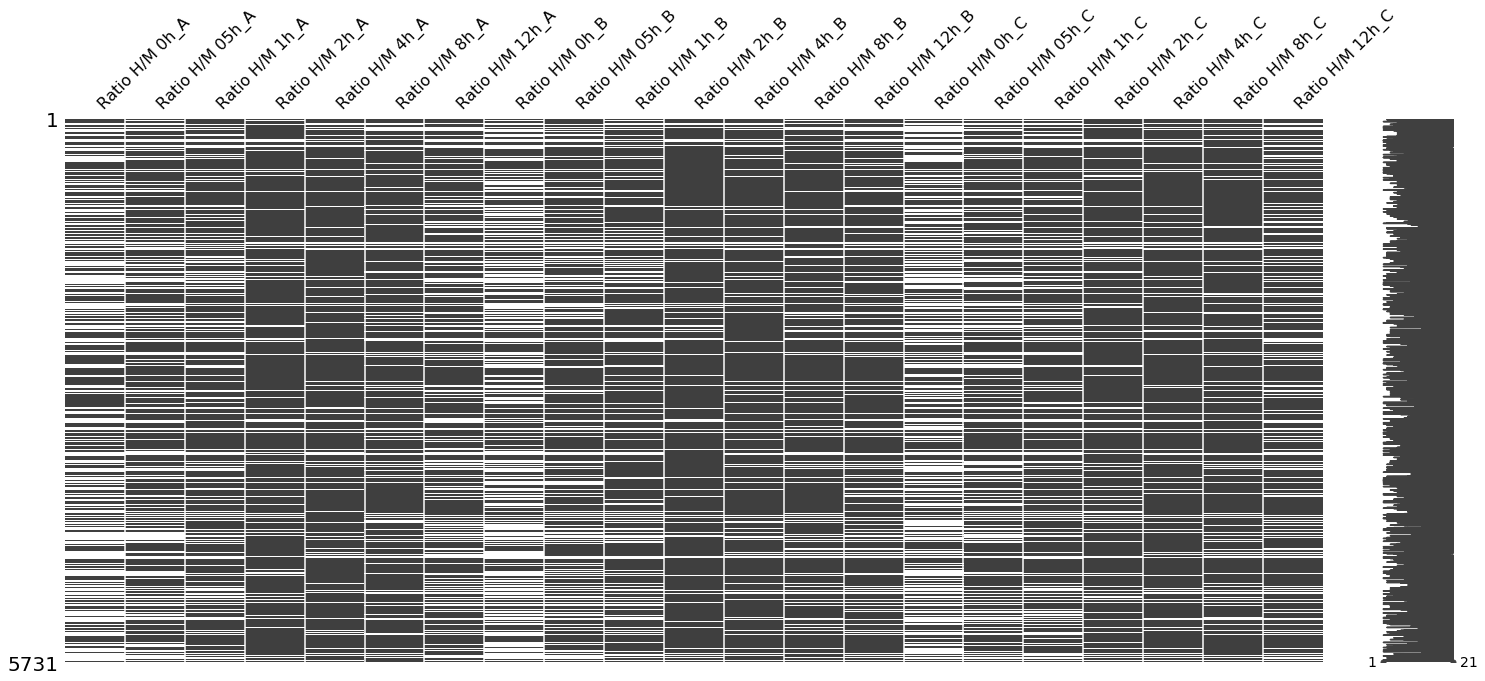

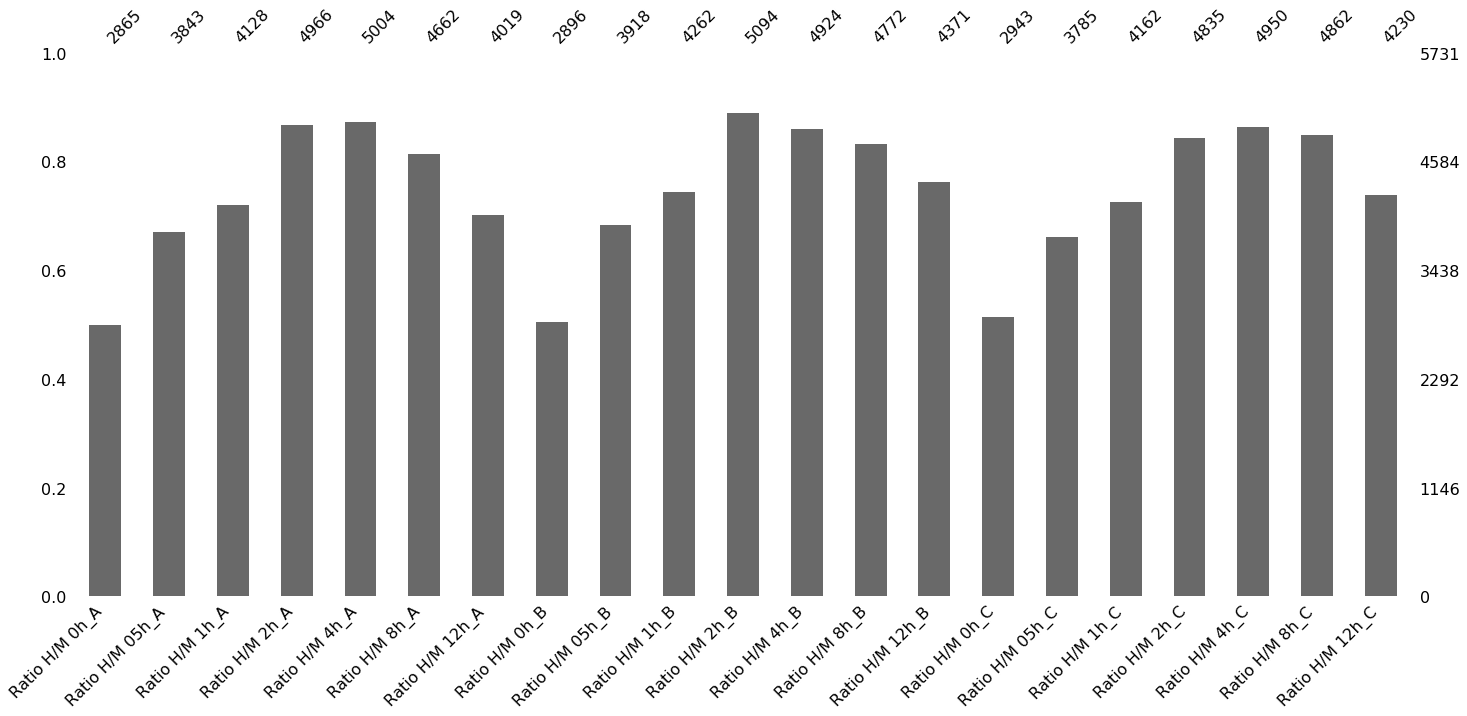

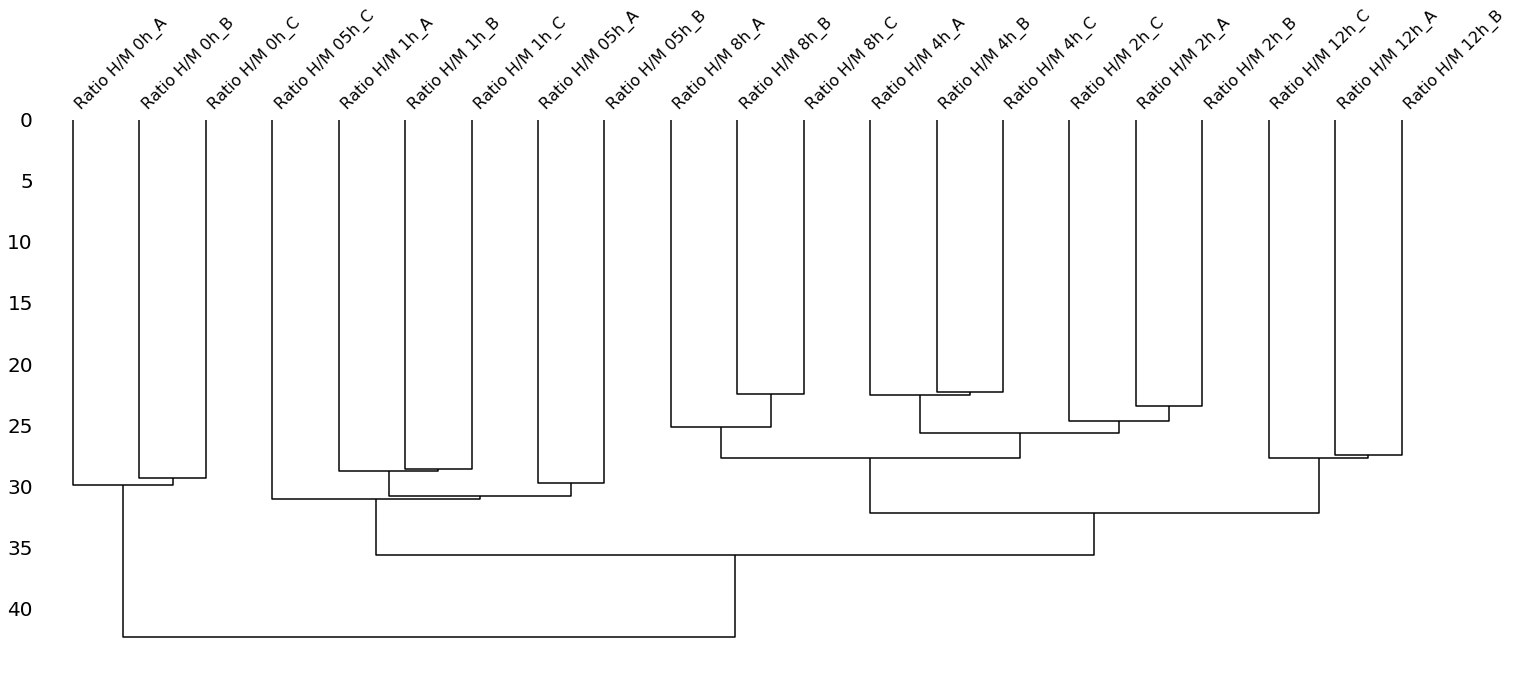

In [10]:
import missingno as msno
msno.matrix(data1.iloc[:,0:21])
plt.show()
msno.bar(data1.iloc[:,0:21])
plt.show()
msno.dendrogram(data1.iloc[:,0:21])

## Correlation Data Analysis
This part looks at the correletions between the time points. We expect to see a diagonal pattern as the closer experimental time points shuld be more similar

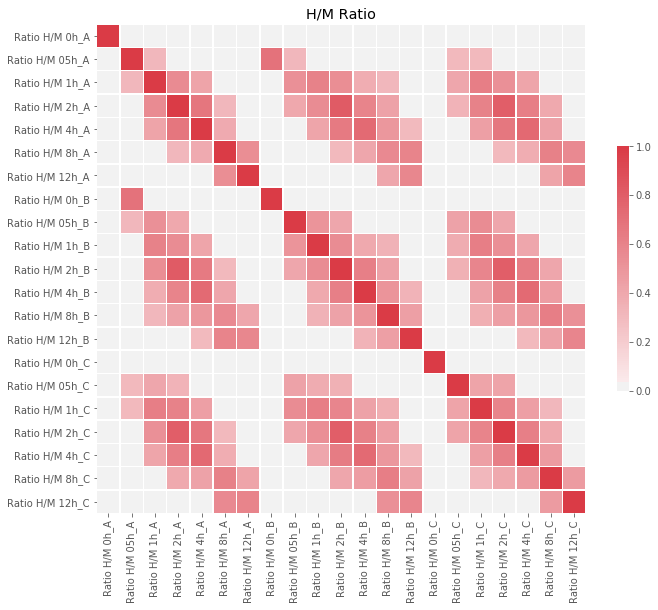

In [11]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
corr = data1.fillna(data1.median()).corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr[corr<0.3]=0
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})#mask=mask,
plt.title('H/M Ratio')
plt.show()

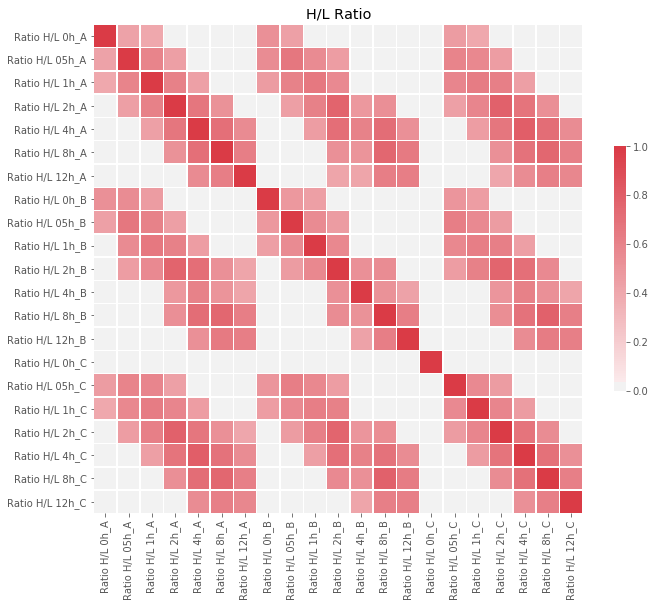

In [12]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
corr = data2.fillna(data2.median()).corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr[corr<0.4]=0
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #mask=mask,
plt.title('H/L Ratio')
plt.show()

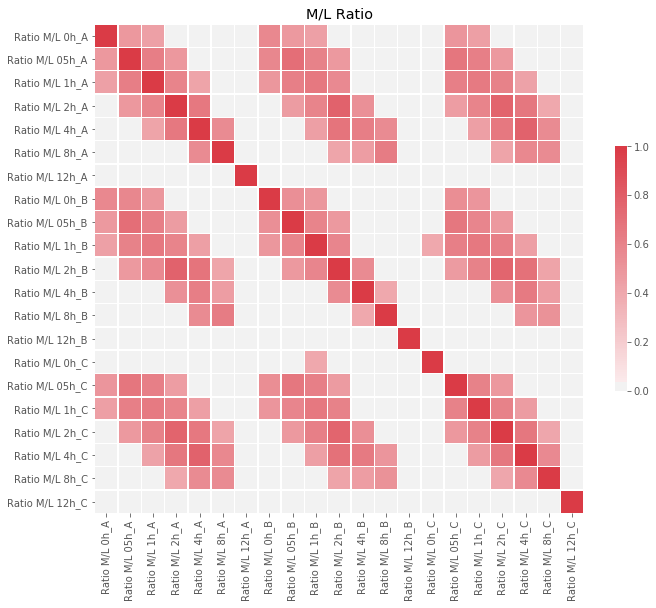

In [13]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
corr = data3.fillna(data3.median()).corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr[corr<0.4]=0
sns.heatmap(corr,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #mask=mask,
plt.title('M/L Ratio')
plt.show()

## PCA Data Analysis

This part makes a PCA plot. We expect the closer time points to appear closer in the plot. Possibly, we shuld be able to sort the time points form start to and, from left to right.  


[0.72942141 0.11150323]


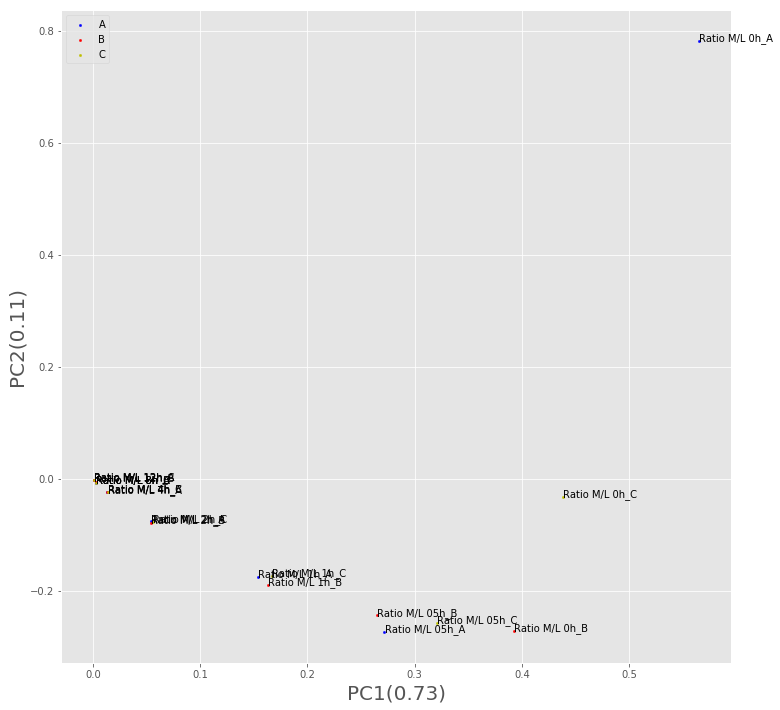

In [14]:
from sklearn.decomposition import PCA
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

def make_pca(in_df, step=7, title=''):
    cols = in_df.columns
    #in_df=in_df.drop(drop,axis=1)
    pca = PCA(n_components=2)
    pca.fit(in_df)
    temp_df = pd.DataFrame()
    temp_df['pc_1']=pca.components_[0]
    temp_df['pc_2']=pca.components_[1]
    temp_df.index = cols
    #print (temp_df)
    print(pca.explained_variance_ratio_)
    fig,ax=plt.subplots(figsize=(12,12))
    temp_df.iloc[0:step,:].plot(kind='scatter',x='pc_1',y='pc_2',s=5, c='b', ax=ax, label = 'A')
    #print(temp_df.iloc[0:step,:])
    temp_df.iloc[step:step*2,:].plot(kind='scatter',x='pc_1',y='pc_2',s=5, c='r', ax=ax, label='B')    
    temp_df.iloc[step*2:step*3,:].plot(kind='scatter',x='pc_1',y='pc_2',s=5, c='y', ax=ax, label='C')
    for i, txt in enumerate(cols):
        ax.annotate(txt, (temp_df['pc_1'].values[i]+0.0003,temp_df['pc_2'].values[i]))
    ax.set_xlabel('PC1({})'.format(round(pca.explained_variance_ratio_[0],2)))
    ax.set_ylabel('PC2({})'.format(round(pca.explained_variance_ratio_[1],2)))
    #ax.set_xlim(0.345,0.360)
    #ax.set_xlabel('PC1')
    #ax.set_ylabel('PC2')
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    #plt.tick_params(axis='both', which='major', labelsize=16, rotation=70, horizontalalignment='right' )
    #plt.setp( axs[1].xaxis.get_majorticklabels(), )
    #fig.savefig('pca.svg')
    #fig.savefig('pca.png')
    #fig.savefig('pca.pdf')
    plt.legend()
    plt.show()

make_pca(data3.dropna()) 

[0.68945943 0.11427215]


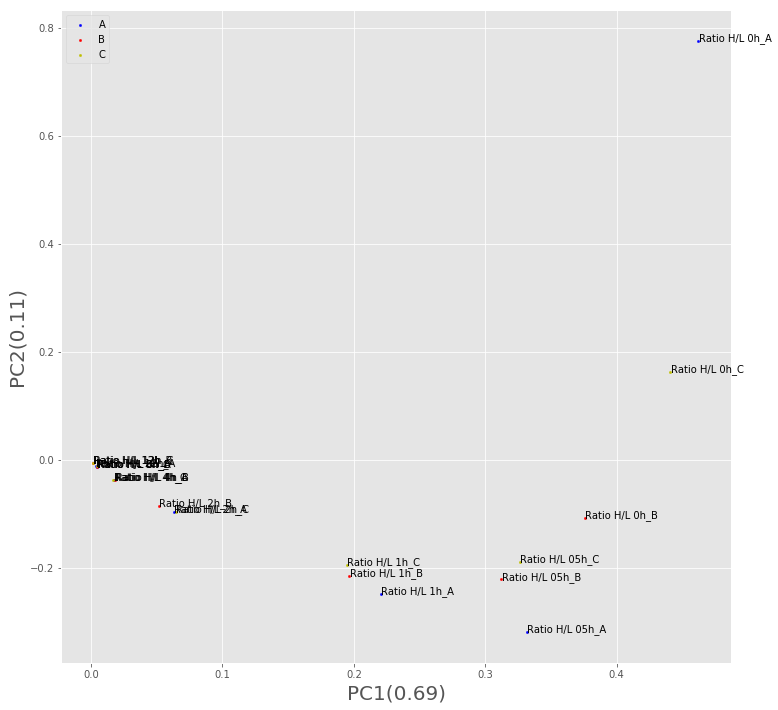

In [15]:
make_pca(data2.dropna())

[0.82841529 0.07024764]


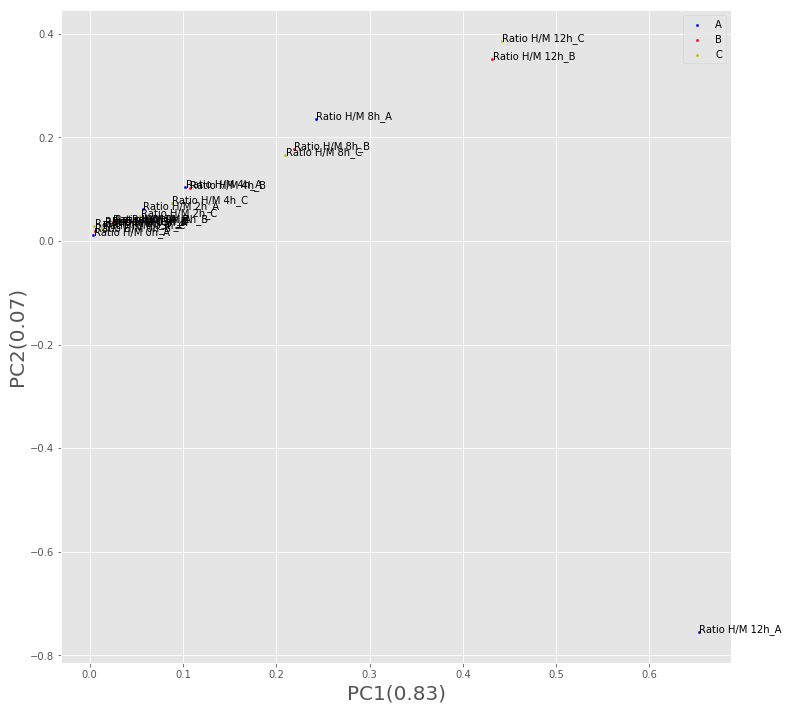

In [16]:
make_pca(data1.dropna())

Strange 12 hour time point of replica A

### Median Degradation Profile

(6023, 21)


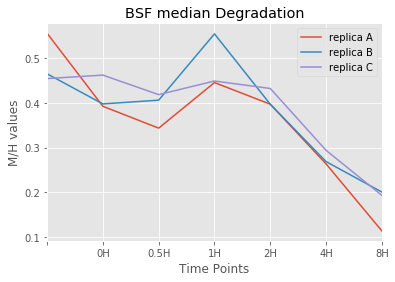

(6023, 21)


In [17]:
plt.style.use('ggplot')
bs_cols = [ 'Ratio H/M {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
deg_data = df[bs_cols]

print (deg_data.shape)
deg_data=1/deg_data
fig,ax=plt.subplots()
deg_data.iloc[:,0:7].median().plot(kind='line',ax=ax,label='replica A')
deg_data.iloc[:,7:14].median().plot(kind='line',ax=ax,label='replica B')
deg_data.iloc[:,14:21].median().plot(kind='line',ax=ax,label='replica C')

#little hack
ax.set_xticklabels(['']+[str(n)+'H' for n in _Hours])
ax.set_xlabel('Time Points')
ax.set_ylabel('M/H values')
plt.title('BSF median Degradation')
plt.legend()
plt.show()
print (deg_data.shape)

### Median synthesis profile

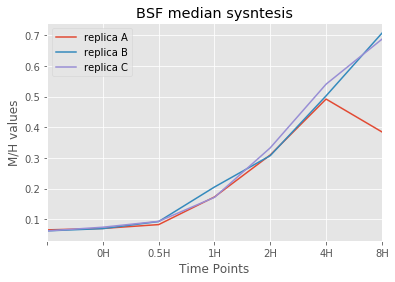

(6023, 21)

In [18]:
plt.style.use('ggplot')
cols = ['Ratio H/L {tp}{rep}'.format(tp=tp, rep=rep) for rep in _TAG_REPLICA for tp in _TAG]
sin_data = df[cols]

sin_data=1/sin_data
fig,ax=plt.subplots()
sin_data.iloc[:,0:7].median().plot(kind='line',ax=ax,label='replica A')
sin_data.iloc[:,7:14].median().plot(kind='line',ax=ax,label='replica B')
sin_data.iloc[:,14:21].median().plot(kind='line',ax=ax,label='replica C')
#little hack
ax.set_xticklabels(['']+[str(n)+'H' for n in _Hours])
ax.set_xlabel('Time Points')
ax.set_ylabel('M/H values')
plt.title('BSF median sysntesis')
plt.legend()
plt.show()
deg_data.shape

Strange 12 hour time point of replica A

### Data Normalization and Cell Division Correction

In [19]:
#little trick, if we set same columns name
#we can do operation on entire dataframe
deg_data.columns = [b + a for a in _TAG_REPLICA for b in _TAG]
sin_data.columns = [b+ a for a in _TAG_REPLICA for b in _TAG]

#normalization
deg_data=deg_data/(deg_data+sin_data)

#growth factor correction
deg_data = deg_data*(_GROWTH_FACTOR)
deg_data.shape

(6023, 21)

In [20]:
print(deg_data.shape)
deg_data.head()

(6023, 21)


,0h_A,05h_A,1h_A,2h_A,4h_A,8h_A,12h_A,0h_B,05h_B,1h_B,...,4h_B,8h_B,12h_B,0h_C,05h_C,1h_C,2h_C,4h_C,8h_C,12h_C
protein_id,,,,,,,,,,,,,,,,,,,,,
Tb04.24M18.150,NaN,0.742502,NaN,0.449281,0.390936,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tb927.5.4450,NaN,0.856290,0.669495,0.771904,0.618135,0.399394,0.158456,NaN,0.857061,NaN,...,0.574661,0.343253,0.146524,NaN,NaN,NaN,0.682416,0.507810,0.289141,0.107857
Tb927.5.4460,0.895199,0.841868,0.821727,0.755636,0.599151,0.354809,0.226512,0.876680,0.867660,0.832793,...,0.586406,0.359179,0.211153,0.865724,0.858744,0.814691,0.739059,0.597263,0.367258,0.197591
Tb927.5.4470,NaN,0.767992,0.796601,0.739873,0.520752,0.372960,0.307599,NaN,0.810669,0.820678,...,0.568615,0.359334,0.234875,NaN,0.835866,0.784244,0.734116,0.541871,0.366278,0.266843
Tb927.5.4480,0.937069,0.924785,0.877539,0.825938,0.651192,0.415106,0.251095,0.952329,0.885957,0.894787,...,0.663162,0.402680,0.256825,0.919384,0.907803,0.884695,0.827444,0.670834,0.405475,0.249605


### Median Normalized Degradetion Profile

(6023, 21)


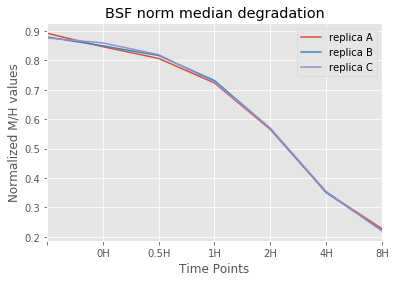

In [21]:
plt.style.use('ggplot')
print (deg_data.shape)
fig,ax=plt.subplots()
deg_data.iloc[:,0:7].median().plot(kind='line',ax=ax,label='replica A')
deg_data.iloc[:,7:14].median().plot(kind='line',ax=ax,label='replica B')
deg_data.iloc[:,14:21].median().plot(kind='line',ax=ax,label='replica C')
ax.set_xticklabels(['']+[str(n)+'H' for n in _Hours])
ax.set_xlabel('Time Points')
ax.set_ylabel('Normalized M/H values')
plt.title('BSF norm median degradation')
plt.legend()
plt.show()

In [22]:

deg_data.iloc[:,0:7]=deg_data.iloc[:,0:7]*1.076
deg_data.iloc[:,7:14]=deg_data.iloc[:,7:14]*1.076
deg_data.iloc[:,14:21]=deg_data.iloc[:,14:21]*1.076

(6023, 21)


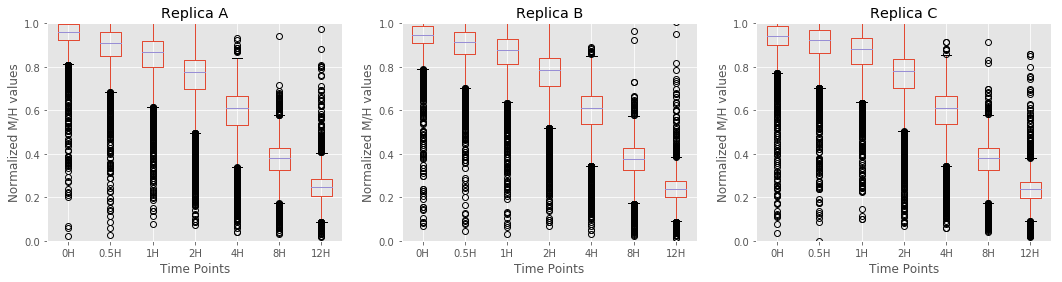

(6023, 21)

In [23]:
warnings.filterwarnings("ignore")
print (deg_data.shape)
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(18,4))
deg_data.iloc[:,0:7].plot(kind='box',ax=ax[0])
deg_data.iloc[:,7:14].plot(kind='box',ax=ax[1])
deg_data.iloc[:,14:21].plot(kind='box',ax=ax[2])
ax[0].set_title('Replica A')
ax[1].set_title('Replica B')
ax[2].set_title('Replica C')
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_xticklabels([str(n)+'H' for n in _Hours])
ax[1].set_xticklabels([str(n)+'H' for n in _Hours])
ax[2].set_xticklabels([str(n)+'H' for n in _Hours])

ax[0].set_xlabel('Time Points')
ax[0].set_ylabel('Normalized M/H values')
ax[1].set_xlabel('Time Points')
ax[1].set_ylabel('Normalized M/H values')
ax[2].set_xlabel('Time Points')
ax[2].set_ylabel('Normalized M/H values')

plt.show()
deg_data.shape

12 hour replica A seems to have higer values respect to replica B and C

### Save Data

In [25]:
deg_data.iloc[:,0:21].head()
deg_data.to_csv(os.path.join('outdata','data_BSF.csv'))

## Comments
The time point 12 hour of replica A seems problematic. I will remove it from the final analysis.

In [26]:
deg_data.head()

,0h_A,05h_A,1h_A,2h_A,4h_A,8h_A,12h_A,0h_B,05h_B,1h_B,...,4h_B,8h_B,12h_B,0h_C,05h_C,1h_C,2h_C,4h_C,8h_C,12h_C
protein_id,,,,,,,,,,,,,,,,,,,,,
Tb04.24M18.150,NaN,0.798932,NaN,0.483426,0.420648,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tb927.5.4450,NaN,0.921368,0.720377,0.830568,0.665113,0.429748,0.170499,NaN,0.922198,NaN,...,0.618335,0.369340,0.157660,NaN,NaN,NaN,0.734280,0.546403,0.311116,0.116054
Tb927.5.4460,0.963234,0.905850,0.884178,0.813065,0.644687,0.381774,0.243727,0.943307,0.933602,0.896085,...,0.630973,0.386476,0.227201,0.931520,0.924008,0.876607,0.795228,0.642655,0.395169,0.212608
Tb927.5.4470,NaN,0.826359,0.857143,0.796103,0.560330,0.401305,0.330977,NaN,0.872280,0.883049,...,0.611830,0.386643,0.252726,NaN,0.899392,0.843847,0.789909,0.583053,0.394115,0.287123
Tb927.5.4480,1.008286,0.995069,0.944232,0.888709,0.700682,0.446654,0.270179,1.024706,0.953290,0.962790,...,0.713562,0.433284,0.276344,0.989257,0.976796,0.951932,0.890329,0.721817,0.436291,0.268575
